### Download dataset from kaggle


In [302]:
# !pip install -q kaggle
# !pip install opendatasets


In [303]:
# import opendatasets as od
# od.download("https://www.kaggle.com/datasets/nani123456789/taxi-trip-fare-prediction/")


In [304]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from inspect import getmembers, isfunction  
import os

%matplotlib inline

warnings.filterwarnings("ignore")


In [305]:
# print(a for a in getmembers(np) if isfunction(a[1]))  
# dir(os)


### Why this?

#### => To predict the fare of cab

In [306]:
cwd = os.getcwd() 
# os.listdir(cwd)
files= os.listdir(cwd+r'\taxi_fare')
train_data = pd.read_csv(cwd+r'\taxi_fare\train.csv')
test = pd.read_csv(cwd+r'\taxi_fare\test.csv')

In [307]:
train_data

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0
...,...,...,...,...,...,...,...,...
209668,1617.0,8.42,1.0,150.00,47,5.800,202.800,0
209669,438.0,1.29,1.0,48.75,12,34.575,95.325,1
209670,571.0,2.82,1.0,63.75,0,6.000,69.750,0
209671,491.0,2.16,1.0,56.25,0,13.500,69.750,0


In [308]:
train_data.describe()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
count,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000
mean,1173.181478,5.054431,1.292808,99.623431,13.030824,15.136829,127.791084,0.280523
std,4775.653621,125.217419,0.930754,85.602702,20.367764,12.553436,98.797374,0.449256
min,0.000000,0.020000,0.000000,0.000000,0.000000,-0.500000,0.000000,0.000000
25%,446.000000,1.950000,1.000000,52.500000,0.000000,6.000000,70.200000,0.000000
50%,707.000000,3.200000,1.000000,75.000000,9.000000,9.750000,101.700000,0.000000
75%,1098.000000,5.730000,1.000000,116.250000,20.000000,26.450000,152.250000,1.000000
max,86387.000000,57283.910000,9.000000,4466.250000,2500.000000,435.000000,4472.250000,1.000000


In [309]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209673 entries, 0 to 209672
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   trip_duration       209673 non-null  float64
 1   distance_traveled   209673 non-null  float64
 2   num_of_passengers   209673 non-null  float64
 3   fare                209673 non-null  float64
 4   tip                 209673 non-null  int64  
 5   miscellaneous_fees  209673 non-null  float64
 6   total_fare          209673 non-null  float64
 7   surge_applied       209673 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 12.8 MB


In [310]:
# train_data.drop('surge_applied',axis=1)

# train_data.astype({"trip_duration ":"float32"}).dtypes
cols = train_data.columns
col_float32 = cols[:4], cols[5:7]

res1 = dict(map(lambda x:(x, 'float32'),list(col_float32[0]) ))
res2 = dict(map(lambda x:(x, 'float32'),list(col_float32[1]) ))
res = {**res1,**res2}

train_data = train_data.astype(res)


### EDA

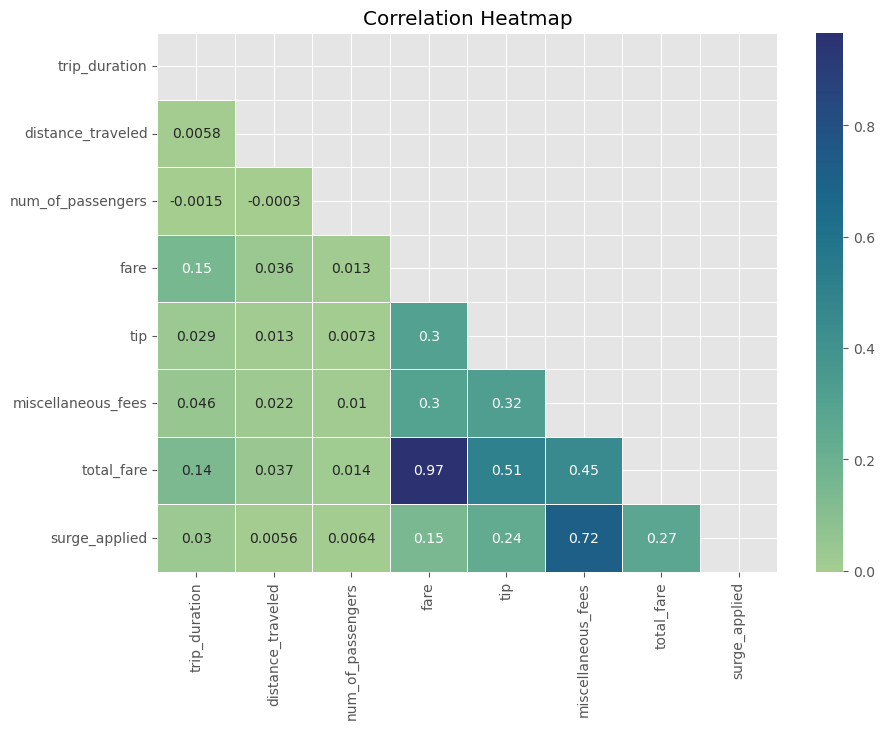

In [311]:
def heatmap(df):
    plt.figure(figsize=(10,7))
    #trip_heatmap = np.triu(corr)
    corr = df.corr()
    mask = np.zeros_like(corr,dtype=np.bool)
    mask[np.triu_indices_from(mask)]=True

    sns.heatmap(corr, cmap='crest', annot=True, mask=mask, linewidths=0.5)

    plt.title('Correlation Heatmap')
    plt.show()

    
heatmap(train_data)

In [312]:

def scatter_plots(df,x,hue=None):
    plt.style.use("ggplot")
    for col in df.columns:
        if col != x:
            if hue is not None:
                sns.scatterplot(data=df,x=x, y=col,hue=hue)
            else: 
                sns.scatterplot(data=df,x=x, y=col)
            plt.show()
            
#scatter_plots(train_data,'total_fare',"surge_applied")

In [313]:
def dist_plots(df):
    sns.set(style='dark',)
    for col in df.columns:
       
        sns.displot(data=df, x=col,kind='kde')
#         sns.histplot(data = df
#             ,x = col
#             ,color = 'purple'
#             ,alpha = 1
#             ,bins = 100
#             )
        plt.show()
        
# dist_plots(train_data)

In [314]:
#Training process

In [327]:
# negative_miscellaneous_fees=train_data.loc[train_data['miscellaneous_fees'] <0]
# negative_miscellaneous_fees

#https://www.kdnuggets.com/2019/06/select-rows-columns-pandas.html

features = train_data.iloc[:,[0,1,2]]
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209673 entries, 0 to 209672
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   trip_duration      209673 non-null  float32
 1   distance_traveled  209673 non-null  float32
 2   num_of_passengers  209673 non-null  float32
dtypes: float32(3)
memory usage: 2.4 MB


In [316]:
# from sklearn.preprocessing import StandardScaler
# df_normalized_bySklearn = features.copy() 
# numerical_cols = df_normalized_bySklearn.select_dtypes(include=['float64', 'int64']).columns
# scaler = StandardScaler()
# df_normalized_bySklearn[numerical_cols]= scaler.fit_transform(df_normalized_bySklearn[numerical_cols])

In [317]:

class StandardScaler:
    def fit_transform(self, df):
        if isinstance(df,pd.DataFrame):
            df_normalized = df.copy() 
            for col in df_normalized.columns:
                df_normalized[col] =  (df_normalized[col]-np.mean(df_normalized[col]))/ (np.std(df_normalized[col]))

            return np.array(df_normalized)
        else:
            np_data=df
            m,n=np_data.shape
            np_data = [[(np_data[:,i]-np.mean(np_data[:,i]))/ (np.std(np_data[:,i]))]
                        for i in range(n)]
            return np_data
        

STD = StandardScaler()

features_SD = STD.fit_transform(features)


In [328]:
fare = train_data['fare']
fare.info()

<class 'pandas.core.series.Series'>
RangeIndex: 209673 entries, 0 to 209672
Series name: fare
Non-Null Count   Dtype  
--------------   -----  
209673 non-null  float32
dtypes: float32(1)
memory usage: 819.2 KB


In [319]:

np.random.seed(42)
x= np.random.rand(3,2)
split=np.random.choice(range(x.shape[0]), int(0.7*x.shape[0]), replace=False)
split_rem = np.delete(range(x.shape[0]),split)


In [320]:
def train_test_split(X,y, test_size,random_state=None):
    
    if random_state is not None: 
        np.random.seed(random_state)
    else:
        np.random.seed(42)
    
    split = np.random.choice(range(X.shape[0]), int((1-test_size)*X.shape[0]),replace=False)
    split_rem = np.delete(range(X.shape[0]),split)

    X_train = X[split]
    y_train = y[split]
    
    X_test =  X[split_rem]
    y_test = y[split_rem]
    
                        
    return np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test)                         
                             
                             


In [321]:
X_train,y_train,X_test,y_test =train_test_split(features_SD,fare, test_size=0.3,random_state=3)

In [322]:
# x=  [x1,x2,1], W = [w1,w2,b]
# y = W.X = x1.w1+x2.w2+b.1 
#so add 1 to the x
# y= [x1,x2,1].[w1,w2,b]


In [323]:
m,n = X_test.shape
z=np.reshape(np.ones(m),(m,1))
X_test=np.concatenate((z,X_test), axis=1)
X_test.shape

(62902, 4)

In [324]:
np.random.seed(42)
W = np.reshape(np.zeros(n+1),(n+1, 1)) # extra 1 -> bias 
p,r=W.shape
W = np.random.rand(p,r)


In [325]:

y_hat = ((np.dot(Z,W) - y_test)**2)/m

MemoryError: Unable to allocate 29.5 GiB for an array with shape (62902, 62902) and data type float64

In [ ]:
class LinearRegression:
    
    def __init__(self, epochs, lr):
        self.epochs = epochs
        self.lr =lr
        self.W = W
        
    def cost_fun(X,y):
        m,n = X.shape
        z=np.reshape(np.ones(m),(m,1))
        W = np.reshape(np.zeros(n+1),(n+1, 1))
        
        X=np.concatenate((z,X), axis=1)
        y_hat = ((np.dot(X,W) - y)**2)/m
        
        
        return y_hat
        
    def fit(self, X,y):
        
        m,n = X.shape
        y_hat = cost_fun(X,y)
        
        
         
    
    
        